In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
host = os.environ.get('DB_HOST_DS4A')
db_name = os.environ.get('DB_NAME_DATATHON')
db_user = os.environ.get('DB_USER_DS4A')
db_password = os.environ.get('DB_PASS_DS4A')

In [3]:
connection_string = f'postgresql://{db_user}:{db_password}@{host}/{db_name}'
engine = create_engine(connection_string)

# Functions

In [4]:
def count_barplot(df, col):
    fig, ax = plt.subplots(figsize=(15,5))
    ax = sns.countplot(x=col, data=df, order=np.sort(df[col].unique()))

# Demographics

In [5]:
demographics = pd.read_sql('select * from demographics', 
                           engine.connect(), 
                           index_col='borough')

demographics.drop('id', axis=1, inplace=True)
demographics.head()

,population,total_income,area_squarekm,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,...,less_than_10000,10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more
borough,,,,,,,,,,,,,,,,,,,,,
Bronx,1372111,66794139347,87.5152,102995,98538,99048,114344,110579,103829,96315,...,75525,45782,68197,53967,63301,72104,42686,38418,11715,7980
Brooklyn,2503518,168500006492,159.6480,177058,159285,156494,170623,195733,222691,202703,...,105868,64435,105583,90596,116024,146853,98214,107195,45358,45069
Manhattan,1584024,198983103829,51.2727,76555,61321,58226,77441,141450,186552,154291,...,71440,39207,62636,51331,64489,94112,73515,99567,56607,132185
Queens,2230286,163702982674,231.4290,132453,123751,123397,139078,160848,184896,177176,...,55668,36527,79695,72079,99299,140095,101834,114328,47029,33343
Staten Island,468730,42324993228,149.0380,28339,30015,30797,32929,31458,29988,29859,...,11241,6381,13051,11721,15934,25193,22729,31191,15978,11660


# Uber 

In [6]:
uber = pd.read_sql('uber_trips',
                   engine.connect(),
                   parse_dates='pickup_datetime',
                   columns=['pickup_datetime', 'affiliate_base', 'borough'])


uber['pickup_datetime'] = pd.to_datetime(uber['pickup_datetime'])
uber['month_year'] = pd.to_datetime(uber['pickup_datetime']).dt.to_period('M')
uber['pickup_hour'] = uber['pickup_datetime'].dt.hour
uber['pickup_weekday'] = uber['pickup_datetime'].dt.weekday
uber.set_index('pickup_datetime', inplace=True)

uber.head()

,affiliate_base,borough,month_year,pickup_hour,pickup_weekday
pickup_datetime,,,,,
2015-02-04 17:13:21,B02682,Manhattan,2015-02,17,2
2015-02-04 17:23:03,B02306,Manhattan,2015-02,17,2
2015-02-04 19:36:23,B02682,Manhattan,2015-02,19,2
2015-02-04 09:30:15,B02682,Manhattan,2015-02,9,2
2015-02-04 20:11:09,B02682,Manhattan,2015-02,20,2


In [7]:
uber.head()

,affiliate_base,borough,month_year,pickup_hour,pickup_weekday
pickup_datetime,,,,,
2015-02-04 17:13:21,B02682,Manhattan,2015-02,17,2
2015-02-04 17:23:03,B02306,Manhattan,2015-02,17,2
2015-02-04 19:36:23,B02682,Manhattan,2015-02,19,2
2015-02-04 09:30:15,B02682,Manhattan,2015-02,9,2
2015-02-04 20:11:09,B02682,Manhattan,2015-02,20,2


In [8]:
bad_trips = uber[uber['borough'] == 'Does not belong to any borough'].shape[0]
bad_trips_pct = bad_trips / uber.shape[0]
uber = uber[uber['borough'] != 'Does not belong to any borough']


print(f'There are {bad_trips} trips that does not belong to any borough. That is the {100* bad_trips_pct:.2f}%. \
We will ignore them.')

There are 122432 trips that does not belong to any borough. That is the 0.65%. We will ignore them.


We are ignoring all the trips that began outside of NY (for example, from New Jersey)

## Trips by month

In [9]:
uber.groupby('month_year').count()

,affiliate_base,borough,pickup_hour,pickup_weekday
month_year,,,,
2014-04,551259,551259,551259,551259
2014-05,636696,636696,636696,636696
2014-06,646174,646174,646174,646174
2014-07,774931,774931,774931,774931
2014-08,803730,803730,803730,803730
2014-09,999105,999105,999105,999105
2015-01,1873186,1953049,1953801,1953801
2015-02,2182040,2262719,2263620,2263620
2015-03,2259773,2258833,2259773,2259773


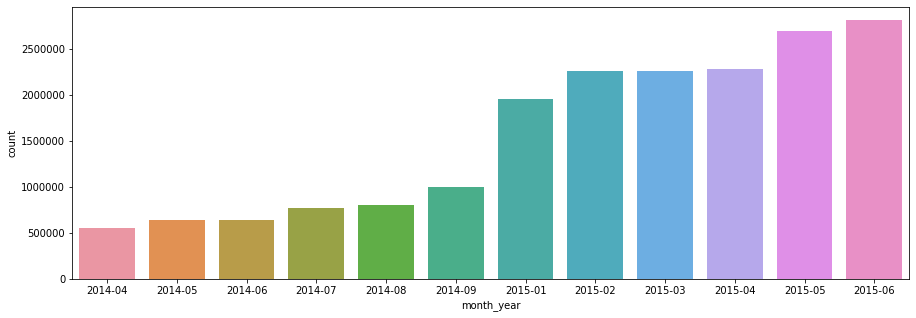

In [10]:
count_barplot(uber, 'month_year')

### By borough and month

In [19]:
uber_bor_m = pd.DataFrame(uber.groupby(['borough', 'month_year']).count()['affiliate_base'])
uber_bor_m.rename(columns={'affiliate_base': 'num_trips'}, inplace=True)
uber_bor_m.reset_index(inplace=True)

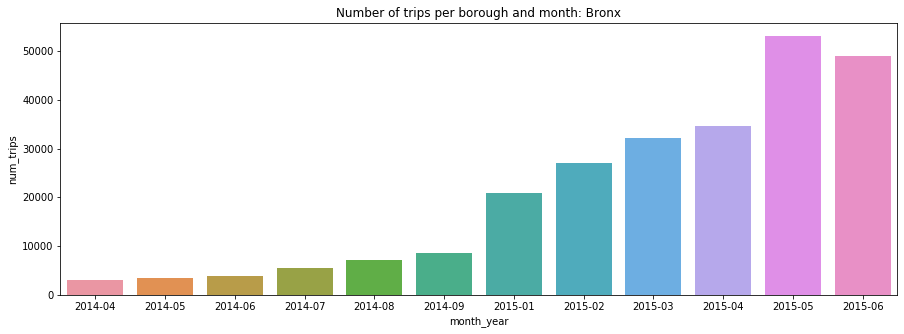

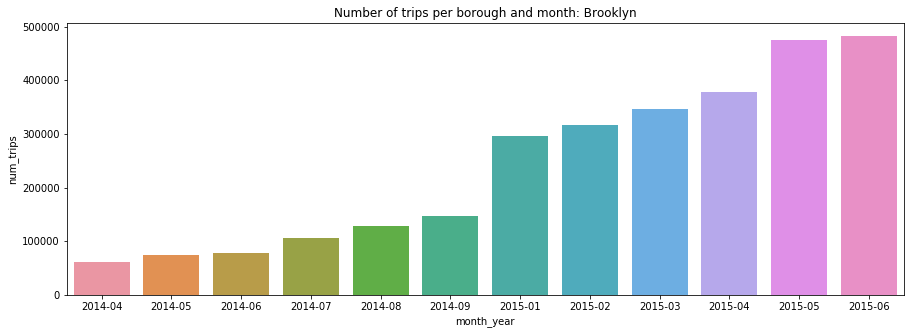

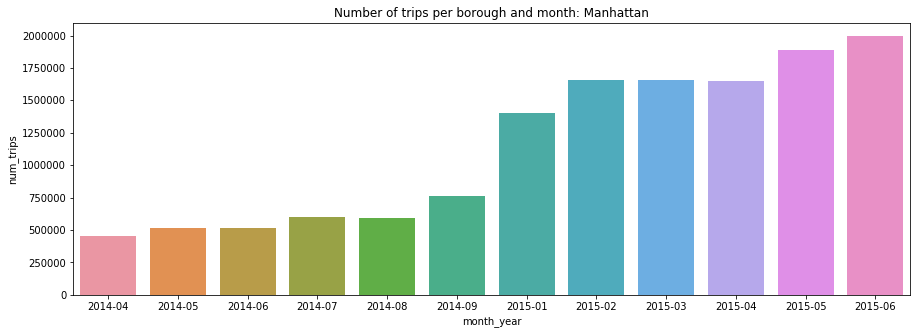

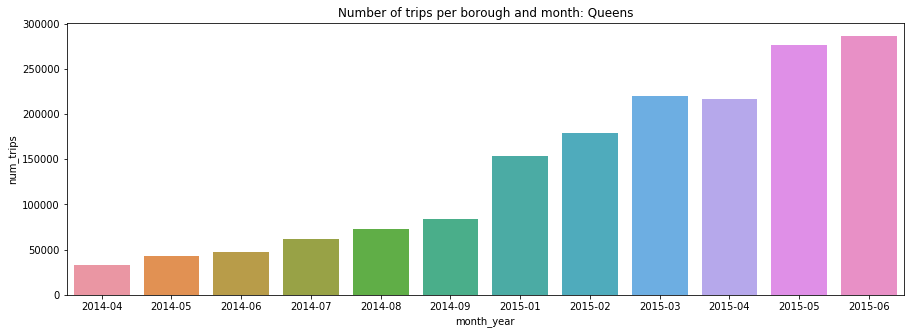

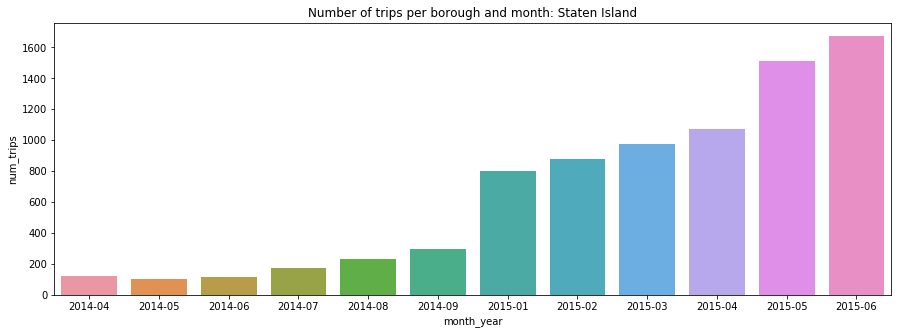

In [20]:
for bor in demographics.index:
    fig, ax = plt.subplots(sharey=True, figsize=(15,5), )
    sns.barplot(x='month_year', y='num_trips', data=uber_bor_m[uber_bor_m['borough'] == bor], ax = ax)
    plt.title(f'Number of trips per borough and month: {bor}')

## Trips by week day

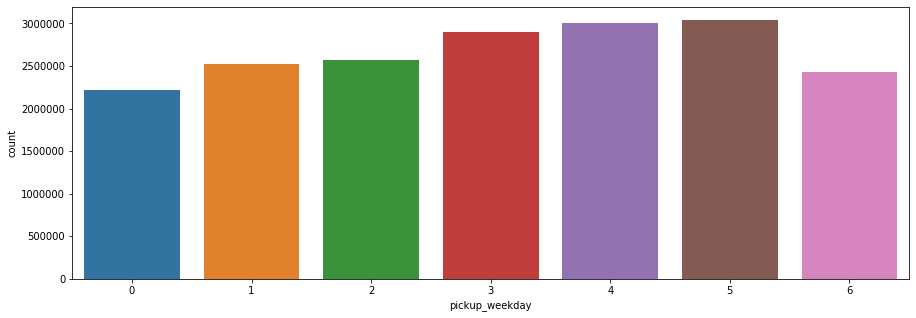

In [11]:
count_barplot(uber, 'pickup_weekday')

### By borough and week day

In [21]:
uber_bor_wd = pd.DataFrame(uber.groupby(['borough', 'month_year']).count()['affiliate_base'])
uber_bor_wd.rename(columns={'affiliate_base': 'num_trips'}, inplace=True)
uber_bor_wd.reset_index(inplace=True)

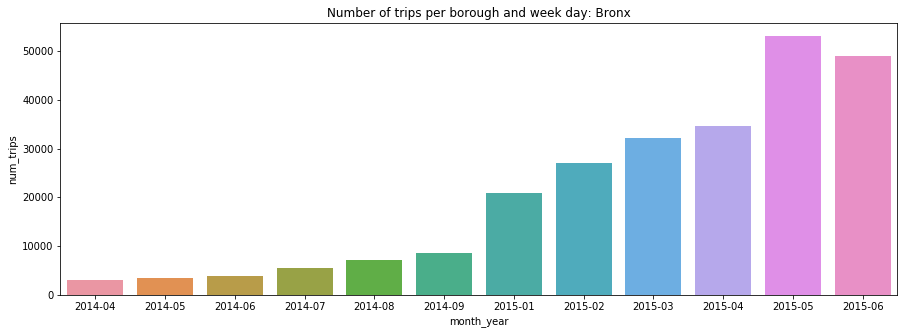

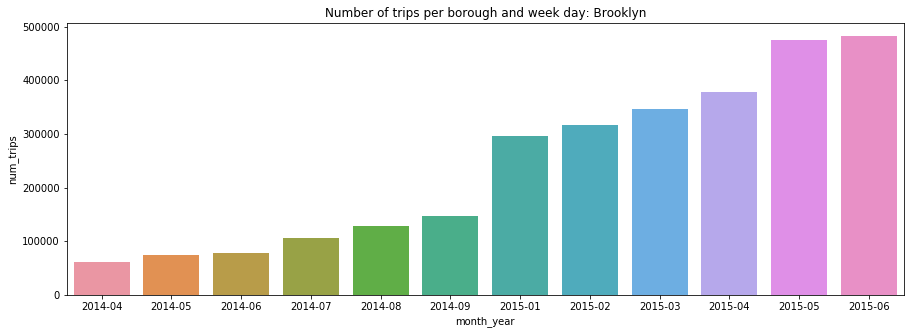

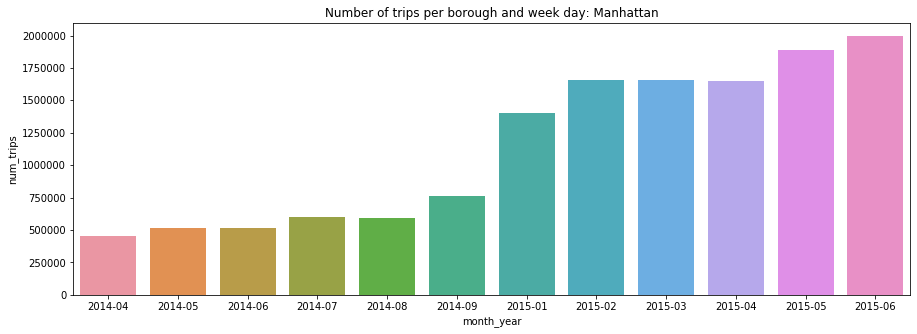

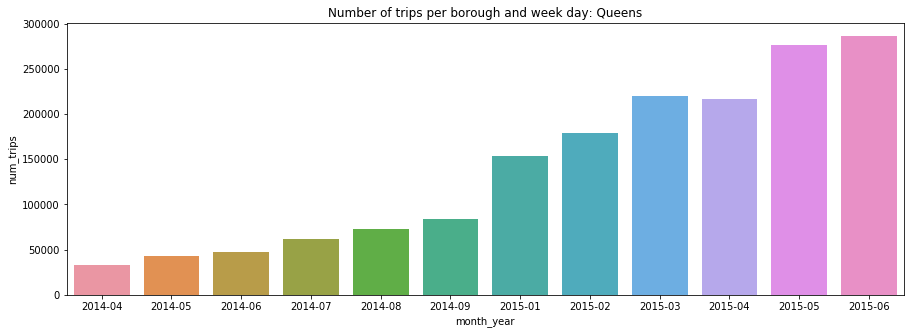

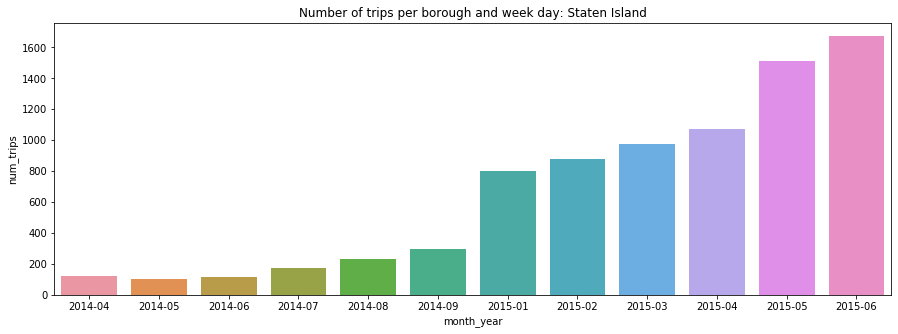

In [22]:
for bor in demographics.index:
    fig, ax = plt.subplots(sharey=True, figsize=(15,5), )
    sns.barplot(x='month_year', y='num_trips', data=uber_bor_wd[uber_bor_wd['borough'] == bor], ax = ax)
    plt.title(f'Number of trips per borough and week day: {bor}')

## By borough

In [12]:
uber_bor = pd.DataFrame(uber.groupby('borough').count()['month_year'])
uber_bor.rename(columns={'month_year': 'num_trips'}, inplace=True)
# uber_bor.reset_index(inplace=True)

In [13]:
uber_bor.head()

,num_trips
borough,
Bronx,251730
Brooklyn,2915594
EWR,105
Manhattan,13814518
Queens,1686170


As expected, Manhattan is by far the borough with most trips per person

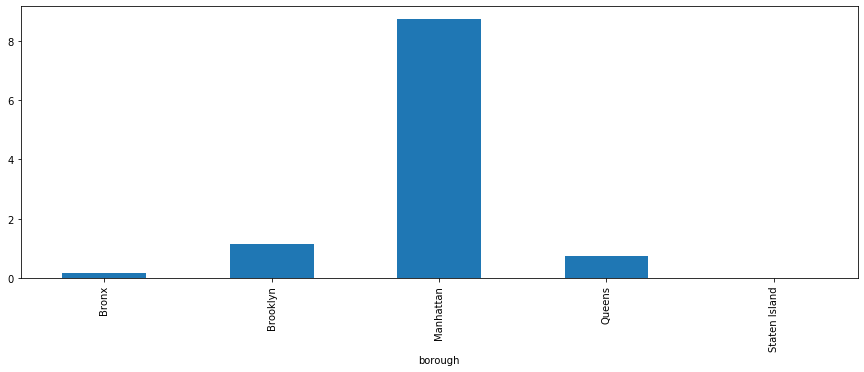

In [14]:
df = uber_bor.join(demographics, how='inner')[['num_trips', 'population']]
df['trips_per_person'] = df['num_trips']/ df['population']
df['trips_per_person'].plot.bar(figsize=(15,5))

# Taxi

In [23]:
taxi = pd.read_sql('taxi_trips',
                   engine.connect(),
                   parse_dates='pickup_datetime',
                   columns=['pickup_datetime', 'borough', 'type'])

taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])
taxi['month_year'] = pd.to_datetime(taxi['pickup_datetime']).dt.to_period('M')
taxi['pickup_hour'] = taxi['pickup_datetime'].dt.hour
taxi['pickup_weekday'] = taxi['pickup_datetime'].dt.weekday
taxi.set_index('pickup_datetime', inplace=True)

taxi.head()

,borough,type,month_year,pickup_hour,pickup_weekday
pickup_datetime,,,,,
2014-04-04 08:22:40,Brooklyn,Y,2014-04,8,4
2014-06-21 19:02:00,Manhattan,Y,2014-06,19,5
2014-06-04 20:49:50,Manhattan,Y,2014-06,20,2
2014-05-16 14:20:49,Manhattan,Y,2014-05,14,4
2014-04-27 13:55:20,Manhattan,Y,2014-04,13,6


In [24]:
taxi.head()

,borough,type,month_year,pickup_hour,pickup_weekday
pickup_datetime,,,,,
2014-04-04 08:22:40,Brooklyn,Y,2014-04,8,4
2014-06-21 19:02:00,Manhattan,Y,2014-06,19,5
2014-06-04 20:49:50,Manhattan,Y,2014-06,20,2
2014-05-16 14:20:49,Manhattan,Y,2014-05,14,4
2014-04-27 13:55:20,Manhattan,Y,2014-04,13,6


In [25]:
bad_trips = taxi[taxi['borough'] == 'Does not belong to any borough'].shape[0]
bad_trips_pct = bad_trips / taxi.shape[0]
taxi = taxi[taxi['borough'] != 'Does not belong to any borough']


print(f'There are {bad_trips} trips that does not belong to any borough. That is the {100* bad_trips_pct:.2f}%. \
We will ignore them.')

There are 182439 trips that does not belong to any borough. That is the 1.58%. We will ignore them.
